<a href="https://colab.research.google.com/github/avichbe/python-amusement/blob/master/home_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import requests as req
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime

# loading the json file from the given URL, need some re-arengemte before import it to DF.
url = "https://www.quandl.com/api/v3/datasets/FSE/BDT_X"
data = req.get(url).json()
colunms = data['dataset']["column_names"]
df = pd.DataFrame.from_dict(data['dataset']['data'])
df.columns = colunms
df = df.head(200)
df

,Date,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
0,2020-12-01,38.00,38.00,38.00,38.00,NaN,0.0,0.00,None,None,NaN
1,2020-11-30,36.60,38.00,36.60,38.00,NaN,25.0,915.00,None,None,NaN
2,2020-11-27,35.65,37.20,35.65,36.50,NaN,180.0,6635.00,None,None,NaN
3,2020-11-26,38.75,38.75,35.70,35.70,NaN,211.0,7687.70,None,None,NaN
4,2020-11-25,36.60,39.05,36.60,38.75,NaN,200.0,7630.00,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
195,2020-02-25,46.50,46.85,43.85,44.05,NaN,12435.0,556886.10,None,None,NaN
196,2020-02-24,47.65,47.65,45.10,45.95,NaN,19602.0,903284.60,None,None,NaN
197,2020-02-21,49.70,49.80,47.90,47.95,NaN,9195.0,444906.34,None,None,NaN
198,2020-02-20,50.10,50.70,49.10,50.10,NaN,8861.0,442607.06,None,None,NaN


In [63]:
df['Date'] = [pd.to_datetime(x) for x in df['Date']]
df.set_index(['Date'])

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2020-12-01,38.00,38.00,38.00,38.00,NaN,0.0,0.00,None,None,NaN
2020-11-30,36.60,38.00,36.60,38.00,NaN,25.0,915.00,None,None,NaN
2020-11-27,35.65,37.20,35.65,36.50,NaN,180.0,6635.00,None,None,NaN
2020-11-26,38.75,38.75,35.70,35.70,NaN,211.0,7687.70,None,None,NaN
2020-11-25,36.60,39.05,36.60,38.75,NaN,200.0,7630.00,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-02-25,46.50,46.85,43.85,44.05,NaN,12435.0,556886.10,None,None,NaN
2020-02-24,47.65,47.65,45.10,45.95,NaN,19602.0,903284.60,None,None,NaN
2020-02-21,49.70,49.80,47.90,47.95,NaN,9195.0,444906.34,None,None,NaN


In [79]:
#monthly avg
df['month'] = pd.to_datetime(df['Date']).dt.month
month_mean = df.resample('M', on='Date').mean()
month_mean = month_mean['Close']

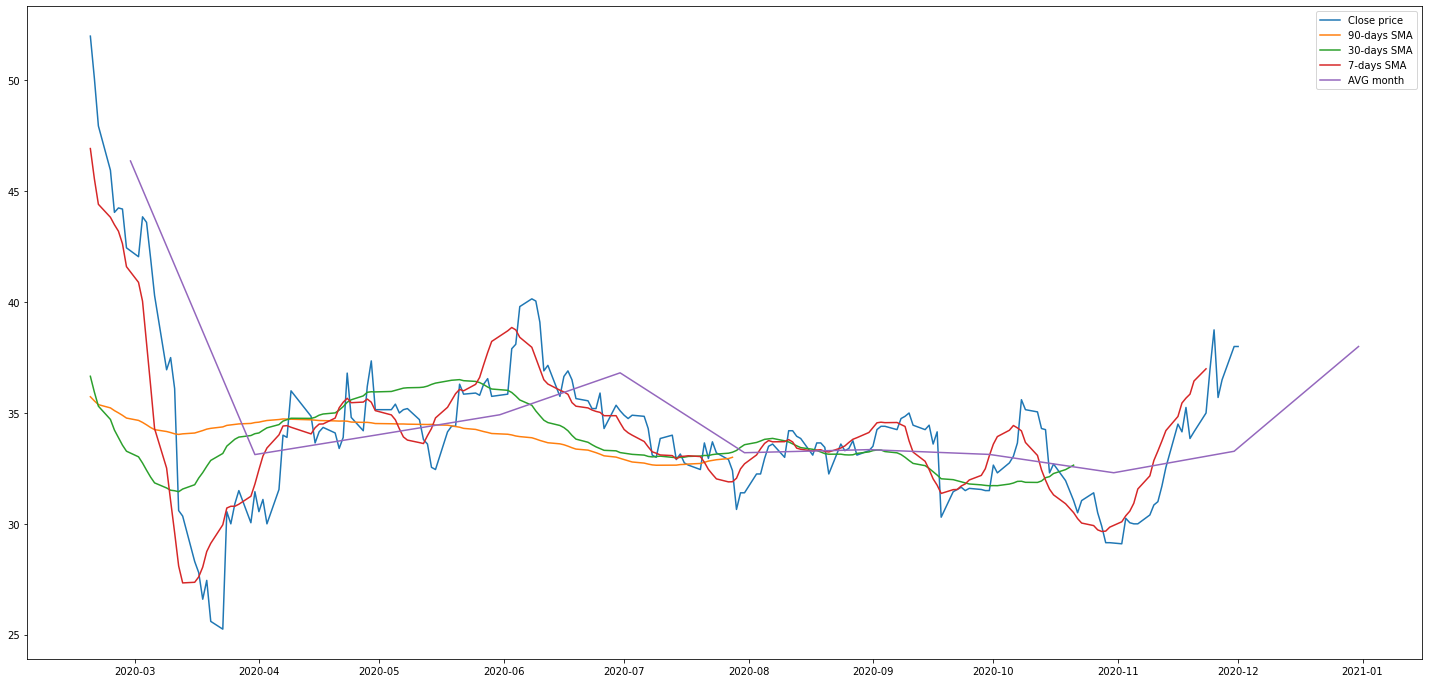

In [81]:
#assumption - Close price is the wanted price when SMA calculated
nine_sma = df['Close'].rolling(window=90).mean()
thirty_sma = df['Close'].rolling(window=30).mean()
seven_sma = df['Close'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(25,12))
ax.plot(df['Date'], df['Close'], label = 'Close price')
ax.plot(df['Date'], nine_sma, label = '90-days SMA')
ax.plot(df['Date'], thirty_sma, label = '30-days SMA')
ax.plot(df['Date'], seven_sma, label = '7-days SMA')
ax.plot( month_mean, label = "AVG month")
ax.legend(loc='best')

plt.show()